In [1]:
# import all dependencies

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import pickle

In [2]:
# pull in the data

url = "players.csv"
df = pd.read_csv(url)
df.head()

,tier,rank,leaguePoints,wins,losses,veteran,inactive,hotStreak,freshBlood
0,6,1,10,142,123,0,0,0,1
1,6,1,21,71,79,0,0,0,1
2,6,1,0,119,101,0,0,1,1
3,6,1,0,132,116,0,0,0,1
4,6,1,2,203,159,0,0,0,1


In [3]:
# defining the target

target = df["tier"]
# target_names = 

In [4]:
# remove the outcomes and a couple of other unwanted variables



data = df.drop("tier", axis=1)
data = data.drop("rank", axis=1)
feature_names = data.columns
data.head()

,leaguePoints,wins,losses,veteran,inactive,hotStreak,freshBlood
0,10,142,123,0,0,0,1
1,21,71,79,0,0,0,1
2,0,119,101,0,0,1,1
3,0,132,116,0,0,0,1
4,2,203,159,0,0,0,1


In [5]:
# train the model using the meaning of life

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

k: 1, Train/Test Score: 1.000/0.769/0.231
k: 3, Train/Test Score: 0.878/0.780/0.098
k: 5, Train/Test Score: 0.853/0.784/0.068
k: 7, Train/Test Score: 0.842/0.788/0.054
k: 9, Train/Test Score: 0.830/0.793/0.037
k: 11, Train/Test Score: 0.826/0.795/0.031
k: 13, Train/Test Score: 0.821/0.795/0.026
k: 15, Train/Test Score: 0.818/0.801/0.017
k: 17, Train/Test Score: 0.817/0.803/0.014
k: 19, Train/Test Score: 0.814/0.805/0.010
k: 21, Train/Test Score: 0.809/0.807/0.002
k: 23, Train/Test Score: 0.809/0.805/0.003
k: 25, Train/Test Score: 0.811/0.809/0.002
k: 27, Train/Test Score: 0.808/0.808/0.001
k: 29, Train/Test Score: 0.809/0.809/-0.000
k: 31, Train/Test Score: 0.807/0.806/0.001
k: 33, Train/Test Score: 0.807/0.806/0.001
k: 35, Train/Test Score: 0.808/0.806/0.002
k: 37, Train/Test Score: 0.808/0.803/0.004
k: 39, Train/Test Score: 0.806/0.805/0.001


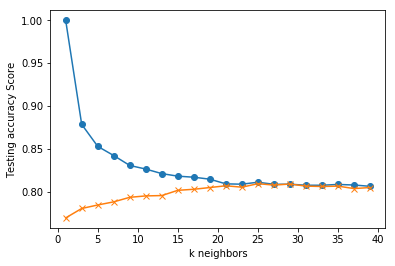

[0.7691680261011419,
 0.7801794453507341,
 0.784257748776509,
 0.7879282218597063,
 0.7932300163132137,
 0.7948613376835236,
 0.7952691680261011,
 0.8013866231647635,
 0.802610114192496,
 0.8046492659053833,
 0.8066884176182708,
 0.8050570962479608,
 0.8091353996737357,
 0.8075040783034257,
 0.8087275693311582,
 0.8062805872756933,
 0.8058727569331158,
 0.8062805872756933,
 0.8034257748776509,
 0.8046492659053833]

In [6]:
# Loop through different k values to see which has the highest accuracy

train_scores = []
test_scores = []
differences = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    difference = knn.score(X_train, y_train) - knn.score(X_test, y_test)
    differences.append(difference)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}/{difference:.3f}")
    
# consistency     
# for x in differences:
#     consistent = (x + 1) - x 
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()


train_scores
test_scores
    

In [7]:
# Need to determine the best K for this dataset
chosenk = 21

knn = KNeighborsClassifier(n_neighbors=chosenk)
knn.fit(X_train, y_train)
print(f'k={chosenk} Test Acc: %.3f' % knn.score(X_test, y_test))

k=21 Test Acc: 0.807


In [8]:
# save the model
import pickle 
  
# Save the trained model as a pickle string. 

filename = 'pickledModel.pkl'
outfile = open(filename,'wb')
pickle.dump(knn,outfile)
outfile.close()

######## START HERE ######### review this!!

# saved_model = pickle.dumps(knn) 
# filename = 'finalized_model.sav'
# pickle.dump(model, open(filename, 'wb'))